# PROJECT

**Create a synthetic dataset and implement outlier detection using three different methods
provided by the PyOD library in Python. The goal is to evaluate the effectiveness of various outlier
detection algorithms in identifying anomalies within the dataset.**





**Dataset Creation**: Generate a synthetic dataset with a mix of normal and anomalous data points.
This dataset should have features that are relevant to the problem at hand.


**Implementation of Outlier Detection**: Utilize PyOD to implement outlier detection using three
different methods. Examples of methods include K-Nearest Neighbors (KNN), Isolation Forest, and
One-Class SVM (OR ANY OTHER).


**Visualization**: Create visualizations to illustrate the detected outliers in the dataset. This could
include scatter plots, decision boundaries, or other visual representations to aid in understanding
the effectiveness of each method.

In [1]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190292 sha256=f417f31a9829d59c5d6ca79939e995071318055846560826d9ae6f091960d4ca
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


Now, let's start by creating a synthetic dataset:

In [13]:
import numpy as np
from sklearn.datasets import make_classification

# Generating a synthetic dataset
# You can adjust the parameters as needed to simulate your problem
n_samples = 1000  # Total number of samples
n_features = 4     # Number of features
n_outliers = 50    # Number of anomalies

X, _ = make_classification(n_samples=n_samples, n_features=n_features, n_informative=3,
                           n_redundant=1, n_clusters_per_class=1, n_classes=2,
                           class_sep=0.5, random_state=42)

# Introduce anomalies in the dataset
random_indices = np.random.choice(X.shape[0], n_outliers, replace=False)
X[random_indices] += 10 * np.random.randn(n_outliers, n_features)

Next, we'll implement outlier detection using three different methods (KNN, Isolation Forest, and One-Class SVM) provided by PyOD:

#### K-Nearest Neighbors (KNN)

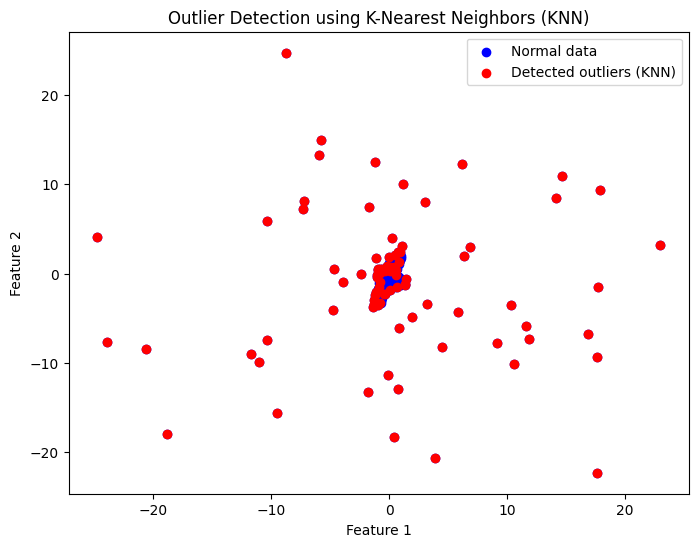

In [14]:
from pyod.models.knn import KNN
import matplotlib.pyplot as plt

# Initialize the KNN model
knn_model = KNN()

# Fit the KNN model to the data
knn_model.fit(X)

# Predict outliers
y_pred_knn = knn_model.predict(X)

# Visualize outliers detected by KNN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='b', label='Normal data')
outliers_knn = X[y_pred_knn == 1]
plt.scatter(outliers_knn[:, 0], outliers_knn[:, 1], color='r', label='Detected outliers (KNN)')
plt.title('Outlier Detection using K-Nearest Neighbors (KNN)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#### Isolation Forest

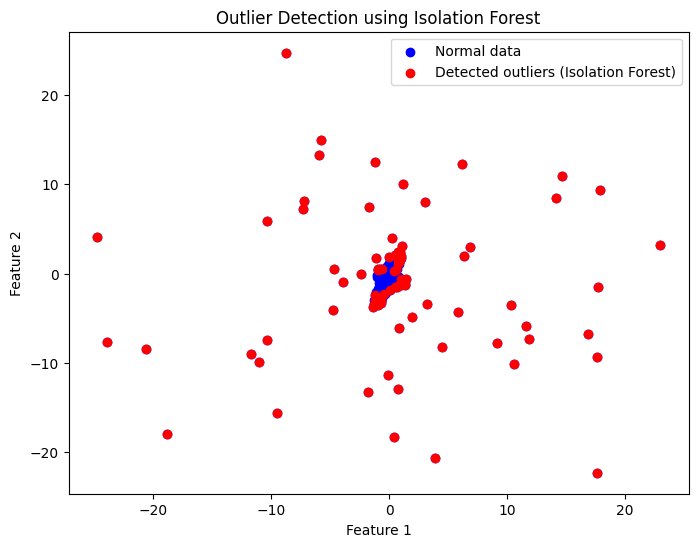

In [15]:
from pyod.models.iforest import IForest

# Initialize the Isolation Forest model
iforest_model = IForest()

# Fit the Isolation Forest model to the data
iforest_model.fit(X)

# Predict outliers
y_pred_iforest = iforest_model.predict(X)

# Visualize outliers detected by Isolation Forest
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='b', label='Normal data')
outliers_iforest = X[y_pred_iforest == 1]
plt.scatter(outliers_iforest[:, 0], outliers_iforest[:, 1], color='r', label='Detected outliers (Isolation Forest)')
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#### One-Class SVM

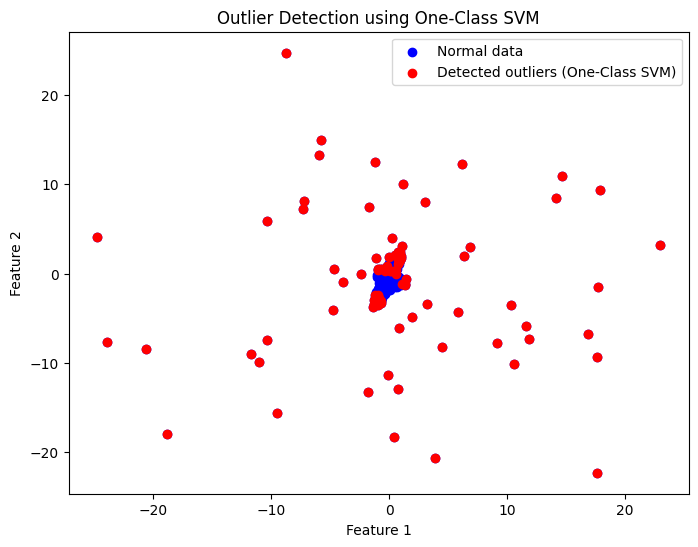

In [16]:
from pyod.models.ocsvm import OCSVM

# Initialize the One-Class SVM model
ocsvm_model = OCSVM()

# Fit the One-Class SVM model to the data
ocsvm_model.fit(X)

# Predict outliers
y_pred_ocsvm = ocsvm_model.predict(X)

# Visualize outliers detected by One-Class SVM
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='b', label='Normal data')
outliers_ocsvm = X[y_pred_ocsvm == 1]
plt.scatter(outliers_ocsvm[:, 0], outliers_ocsvm[:, 1], color='r', label='Detected outliers (One-Class SVM)')
plt.title('Outlier Detection using One-Class SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()